# Idalee Vargas 

## March 01, 2024

# 0.) Import and Clean data

In [99]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [101]:
#drive.mount('/content/gdrive/', force_remount = True)

In [102]:
df = pd.read_csv("bank-additional-full.csv", sep=";")

In [103]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [104]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [105]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [106]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

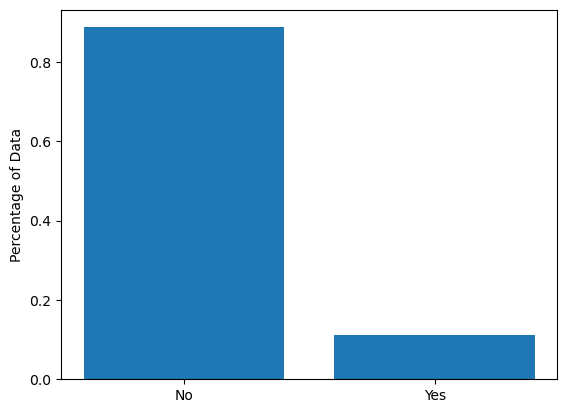

In [107]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [108]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [109]:
###############
###TRANSFORM###
###############

# X_scaled = 
# y_train = scaler.transform(y_train)
smote = SMOTE() 
X_smote, Y_smote = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [110]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 1.025\ngini = 0.2\nsamples = 28831\nvalue = [25580, 3251]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.197\ngini = 0.134\nsamples = 25702\nvalue = [23841, 1861]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.063\nsamples = 16326\nvalue = [15795, 531]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.055\nsamples = 16102\nvalue = [15644, 458]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.439\nsamples = 224\nvalue = [151, 73]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 3.6\ngini = 0.243\nsamples = 9376\nvalue = [8046.0, 1330.0]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.227\nsamples = 9175\nvalue = [7980, 1195]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.441\nsamples = 201\nvalue = [66, 135]\nclass = Yes'),
 Text(0.75, 0.625, 'duration <= 2.22\ngini = 0.494\nsamples = 3129\nvalue = [1739.0, 1390.0]\nclass = No'),
 Text(0.625, 0.375, 'contact_telephone <= 0.283\ngini = 0.466\nsamples = 2028\nvalue = [1279, 749]\nclass = No'),
 Te

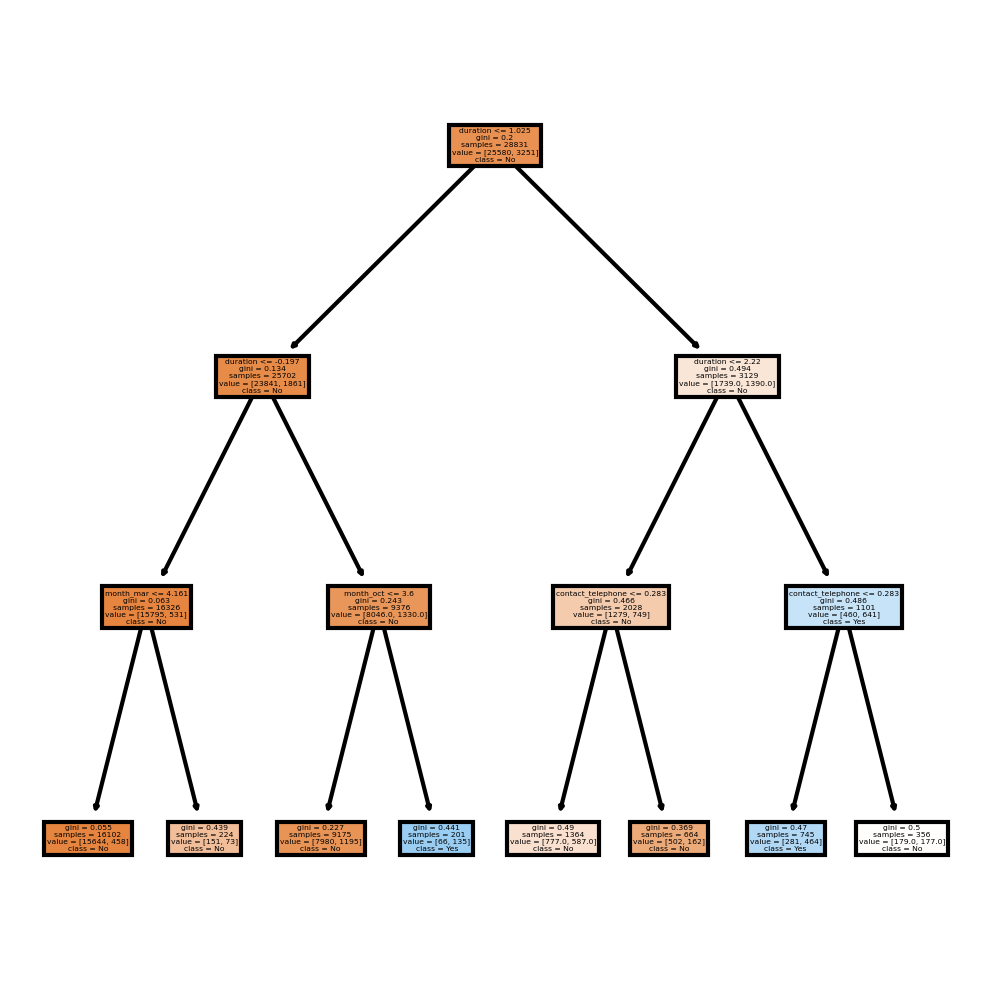

In [111]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [112]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

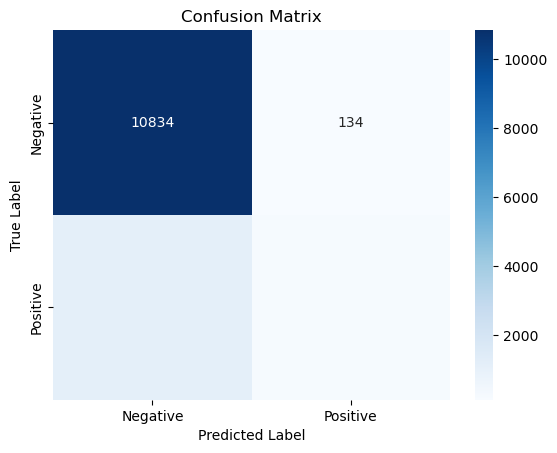

In [113]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [114]:
# Placeholder for optimizing max depth 

dtree= DecisionTreeClassifier(max_depth = 3)

In [115]:
bagging = BaggingClassifier(estimator = dtree,
                          n_estimators = 100,
                          max_samples =.5,
                          max_features = 1.)

In [116]:
bagging.fit(X_scaled, y_train) 
y_pred = bagging.predict(X_test) 

In [117]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

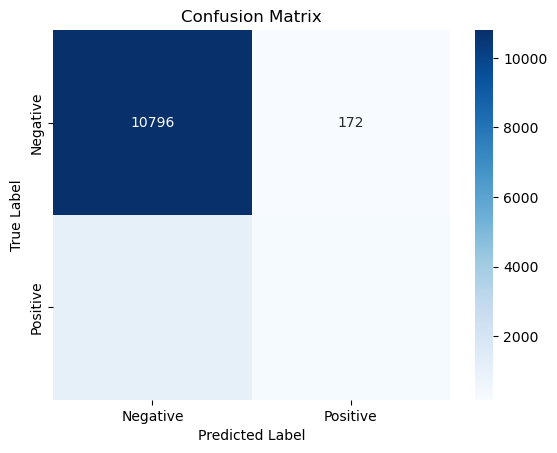

In [118]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [119]:
# Observing that it has improved compared to the first simulation

# 4.) Boost your tree

In [120]:
from sklearn.ensemble import AdaBoostClassifier

In [121]:
# Placeholder for optimizing max depth 

dtree= DecisionTreeClassifier(max_depth = 3)


In [122]:
boost = AdaBoostClassifier(estimator = dtree, 
                           n_estimators = 100, 
                          learning_rate = .1)

In [123]:
boost.fit(X_scaled, y_train)

y_pred = boost.predict(X_test)

In [124]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

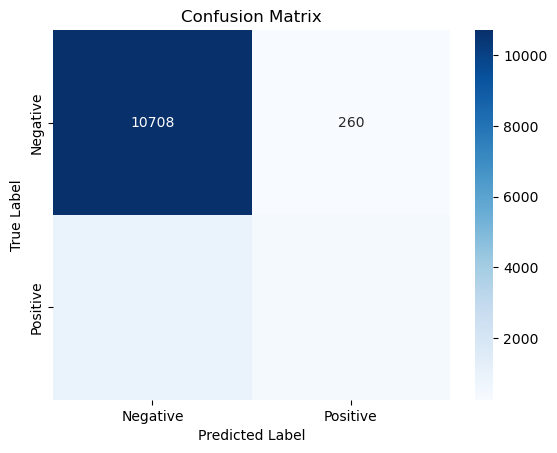

In [125]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [126]:
# pip install mlens

In [127]:
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier

# from mlens.ensemble import SuperLearner

In [128]:
# The three trained models 
base_predictions = [list(dtree_main.predict(X_train)), 
                    list(boost.predict(X_train)), 
                    list(bagging.predict(X_train))]

In [129]:
base_predictions_transpose = np.array(base_predictions).transpose()
# base_predictions.reshape(-1,1)

In [130]:
super_learner = LogisticRegression()
super_learner.fit(base_predictions_transpose, y_train)

LogisticRegression()

In [131]:
super_learner.coef_

array([[ 1.17798336, -0.97371215, -0.97134981]])

Following the previous results, we can observe that the coefficients from the logistic regression represent the importance of the classification model to train the level 1 model (meta-model). Hence, in this case we can observe that the Decision Tree coefficient means a higher trust of that model to predict the positive class. It assigns a higher probability to predict the positive class. In the case of the Ada Boost base model, corresponds to a negative influence over the prediction of the positive class hence the negative coefficient. In the case of the Bagging coefficient, also with a negative one, correponds to the case where bagging predicts a higher probability of the positive class, there would be a negative impact of the ensamble prediction. At the end, it can be said that the meta model is giving the highest weight to the decision tree to predict the positive class, and it's being cautios with the Ada Boost and Bagging classifiers. 

# 6.)